# **Exploratory Data Analysis on Haberman data set.**
Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA is for seeing what the data can tell us beyond the formal modelling or hypothesis testing task.


#Data Set Description : 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of data points: 306
Number of Attributes: 4 (including the class attribute)

Attribute Information:



*   Age of patient at time of operation (numerical).
*   Patient’s year of operation (1958–1969, numerical)

*   Number of positive axillary nodes detected/Lymph Nodes (numerical)

 Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

  Source: https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes
*   Survival status (class attribute). It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.
    
    -    1 = the patient survived 5 years or longer
    -    2 = the patient died within 5 years

*   Missing Attribute Values: None

Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)

# **Objective :** 
To classify/predict a patient survival who had undergone breast cancer surgery.


# Importing libraries and loading the file



In [2]:
import pandas as pd # Data analysis and manipulation 
import numpy as np # Numerical operations
import io

#code to upload the CSV data file from your local drive
# Source : https://colab.research.google.com/notebook#fileId=1JmwtF5OmSghC-y3-BkvxLan0zYXqCJJf
from google.colab import files
uploaded = files.upload()

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

#Load haberman.csv into a pandas dataFrame.
haber = pd.read_csv(io.StringIO(uploaded['haberman.csv'].decode('utf-8')))

#Prints the first 5 entries from the csv file
haber.head()

Saving haberman.csv to haberman.csv


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#prints the number of rows and number of columns
haber.shape

(306, 4)

**Observation :** CSV file contains 306 rows and 4 columns

In [4]:
#printing the columns
haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
#brief info about the dataset
print(haber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


**Observation :** 

- There are no missing values in this data set.

- All the columns are of the integer data type.

- The datatype of the status is an integer, it has to be converted to a categorical datatype

- In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years.

In [6]:
#mapping the values of 1 and 2 to yes and no respectively and #printing the first 5 records from the dataset.
haber['status'] = haber['status'].map({1:'Yes', 2:'No'})
haber.head() 

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [7]:
#describes the dataset
haber.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observations:**

- Count : Total number of values present in respective columns.

- Mean: Mean of all the values present in the respective columns.

- Std: Standard Deviation of the values present in the respective columns.

- Min: The minimum value in the column.

- 25%: Gives the 25th percentile value.

- 50%: Gives the 50th percentile value.

- 75%: Gives the 75th percentile value.

- Max: The maximum value in the column.

In [8]:
#gives each count of the status type
haber["status"].value_counts()

Yes    225
No      81
Name: status, dtype: int64

**Observations:**

- The value_counts() function tells how many data points for each class are present. Here, it tells how many patients survived and how many did not survive.

- Out of 306 patients, 225 patients survived and 81 did not.

In [9]:
#status_yes dataframe stores all the records where status is yes
status_yes = haber[haber['status']=='Yes']
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [10]:
#status_no dataframe stores all the records where status is no
status_no = haber[haber['status']=='No']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


**Observations:**

- The mean age and the year in which the patients got operated are almost similar of both the classes. 
- The mean of the nodes of both the classes differs by 5 units approximately.

- The nodes of patients who survived are less when compared to patients who did not survive.


# Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them


**2-D Scatter Plot**

Uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis.

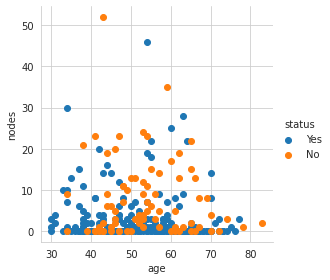

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(haber, hue = "status" , height = 4)\
 .map(plt.scatter,"age","nodes")\
 .add_legend()
plt.show()

**Observation(s):**
- Patients with 0 nodes are more likely to survive irrespective of their age.
- There are hardly any patients who have nodes more than 25.
- Patients aged more than 50 with nodes more than 10 are less likely to survive.
- In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable

**Pair-plots**

By default, this function will create a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below.

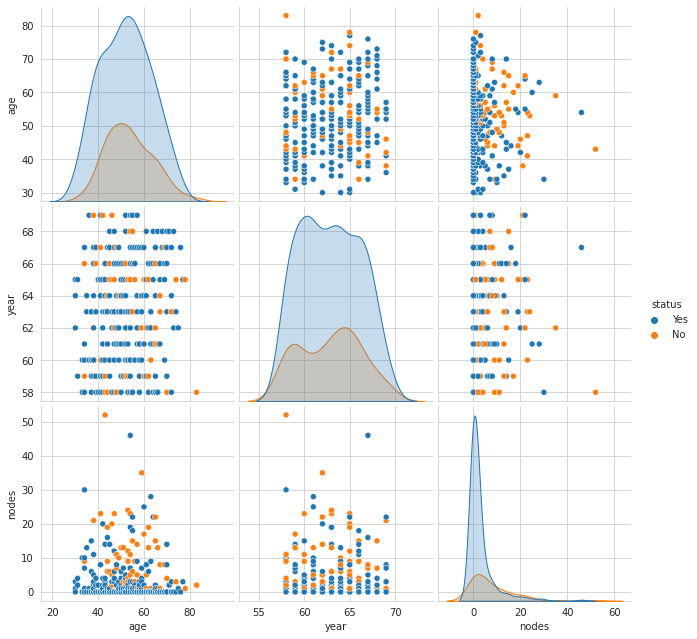

In [12]:
sns.set_style("whitegrid")
sns.pairplot(haber, hue="status", height = 3)
plt.show()

**Observations:**

- The plot between year and nodes is comparatively better.

- In operation year, 60-65 more person died who has less than 6 lymph node.

- Age vs Operation Year and Operation year vs lymph Nodes - Highly overlapping and thus not useful for making any classification decision.

- Age vs lymph Nodes - Still quite Overlapping but better than the above two cases. So we may select these 2 features for univariate analysis.

- Conclusion- The age of the patient and the number of lymph nodes are the best features to predict the chances of survival.



**1D-Scatter Plots**

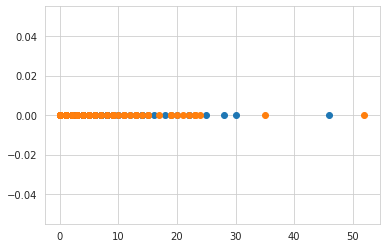

In [13]:
import numpy as np
haber_Long_Survive = haber.loc[haber["status"] == 'Yes'];
haber_Short_Survive = haber.loc[haber["status"] == 'No'];
plt.plot(haber_Long_Survive["nodes"], np.zeros_like(haber_Long_Survive["nodes"]), 'o')
plt.plot(haber_Short_Survive["nodes"], np.zeros_like(haber_Short_Survive["nodes"]), 'o')
plt.show()

**Observation**

- After looking at this plot we can easily count number of points that are there in age range who survived or not.
- Many person died whose age was between 41-70.

#Univariate Analysis(Histogram, pdf, cdf, boxplot and violin plot) 
The major purpose of the univariate analysis is to describe, summarize and find patterns in the single feature.

**PDF of Age**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


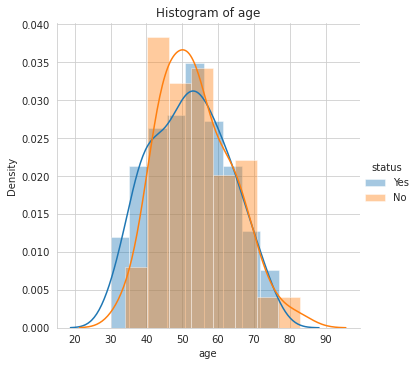

In [14]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram of age")   
plt.ylabel("Density")
plt.show();

**Observations:**

- Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
- Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.
- Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age parameter

**PDF of Nodes**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


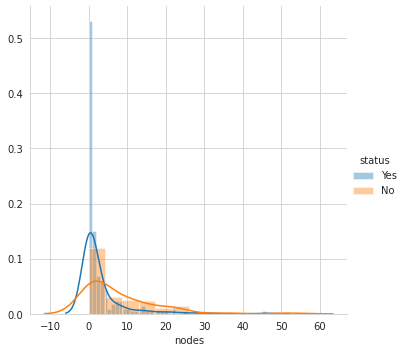

In [15]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

**observations**

- Patients with no nodes 0-5 are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.
- Generally we can say, that people survive long if they have less lymph nodes detected and vice versa but still this datapoint as well not hugely beneficial to classify.
- PDF peak is high so there are more data of survival .

**PDF of operation age**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


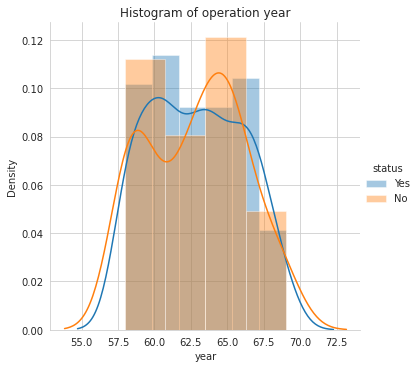

In [16]:
sns.FacetGrid(haber, hue = "status", size = 5) \
    . map(sns.distplot, "year") \
    .add_legend()
plt.title("Histogram of operation year")
plt.ylabel("Density")
plt.show()

**Observations:**

- There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.
- However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.
- Same goes for survival status on the basis of the year of operation - its highly overlapping. So, using this datapoint we cannot predict anything

**CDF(Cummulative Distributed Function)**

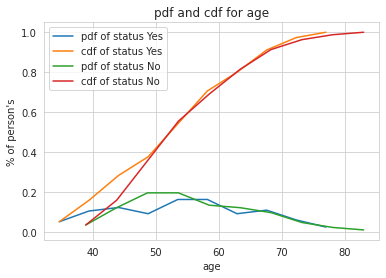

In [17]:
# one = haber.loc[haber["status"] == Yes]
# two = haber.loc[haber["status"] == No]
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf
# Here, Class Yes means survived
# Class No means not survived
one = haber.loc[haber["status"] == 'Yes']
two = haber.loc[haber["status"] == 'No']
label = ["pdf of status Yes", "cdf of status Yes", "pdf of status No", "cdf of status No"]
counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

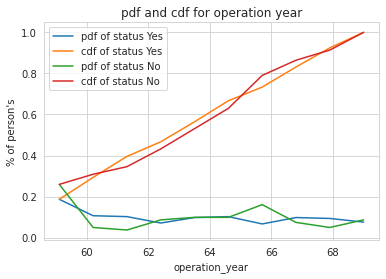

In [18]:
label = ["pdf of status Yes", "cdf of status Yes", "pdf of status No", "cdf of status No"]
counts, bin_edges = np.histogram(one["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for operation year")
plt.xlabel("operation_year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

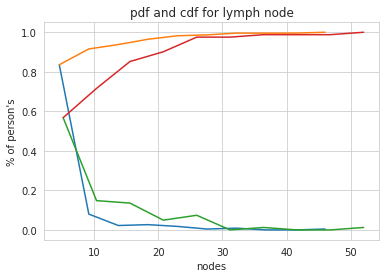

In [19]:
label = ["pdf of status Yes", "cdf of status Yes", "pdf of status No", "cdf of status No"]
counts, bin_edges = np.histogram(one["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for lymph node")
plt.xlabel("nodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

**Observations**

- 15% of the person's have less than or equal to age 37 who survived.
- Perosons' who has more than 46 lymph node not survived.
- We can see as number of axillary nodes increases survival chances also reduces (from the PDF plot).
- Its observed that 80% — 85% of people have good chances of survival if they have less number of lymph nodes detected and as nodes increases the survival status decreases.
- 100% of the people are likely not to survive if they have 40 or more lymph nodes.

**Mean, Variance and Std-dev**

In [ ]:
#Mean, Variance, Std-deviation,  

print("Means:")
print (np.mean(haber_Long_Survive["nodes"]))
#Mean with an outlier.
print (np.mean(np.append(haber_Long_Survive["nodes"],50)))
print (np.mean(haber_Short_Survive["nodes"]))

print("\nStandard Deviation:")
print(np.mean(haber_Long_Survive["nodes"]))
print(np.mean(haber_Short_Survive["nodes"]))

Means:
2.7911111111111113
3.0
7.45679012345679

Standard Deviation:
2.7911111111111113
7.45679012345679


**Median, Percentile, Quantile, IQR, MAD**

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("Medians :")
print(np.median(haber_Long_Survive["nodes"]))
#Median with an outlier
print(np.median(np.append(haber_Long_Survive["nodes"],50)))
print(np.median(haber_Long_Survive["nodes"]))
print("\nQuantiles :")
print(np.percentile(haber_Long_Survive["nodes"],np.arange(0,100,25)))
print(np.percentile(haber_Long_Survive["nodes"],np.arange(0,100,25)))
print("\n90th percentile :")
print(np.percentile(haber_Long_Survive["nodes"],90))
print(np.percentile(haber_Long_Survive["nodes"],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_Long_Survive["nodes"]))
print(robust.mad(haber_Long_Survive["nodes"]))

Medians :
0.0
0.0
0.0

Quantiles :
[0. 0. 0. 3.]
[0. 0. 0. 3.]

90th percentile :
8.0
8.0

Median Absolute Deviation
0.0
0.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Box plot and Whiskers**

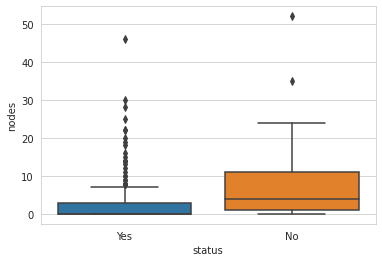

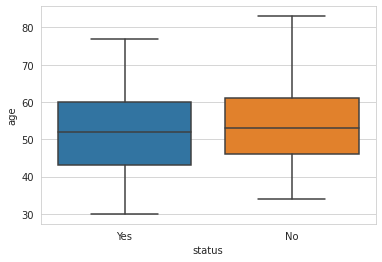

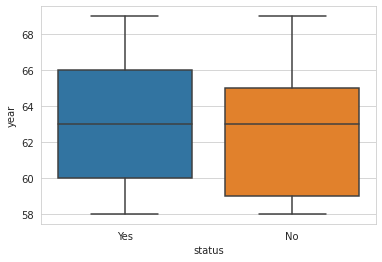

In [ ]:
sns.boxplot(x='status',y='nodes', data=haber)
plt.show()

sns.boxplot(x='status',y='age',data=haber)
plt.show()

sns.boxplot(x='status',y='year',data=haber)
plt.show()

**Observation**

- Patients with lymph nodes less then 5, tends to survive.
- Around 80% of the patients have less than 11 lymph nodes.
- Almost all who survived more than 5 years after surgery had maximum positive axillary nodes about 8
- However, there are a lot of outlier data points related to the "nodes" feature. Specially in the segment where people survived.

- The 25th to 75th values for class 'Yes' lies between 43 to 60 of age & for class 'NO' its between 47 to 61 of age.

- Both classes (Yes and No status of survival ) distributions comparison over Age attribute seems both classes have mixed character. They have almost the same median and their 25th to 75th precentile range are also very closely matching. Hence, not helpful to distinguish the classes.

**Violin Plot**

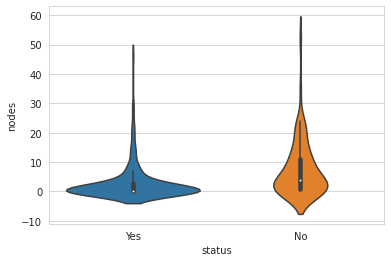

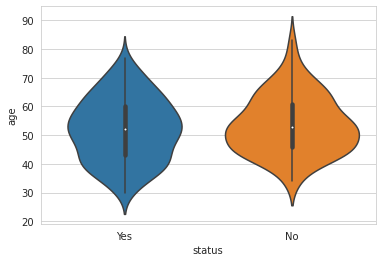

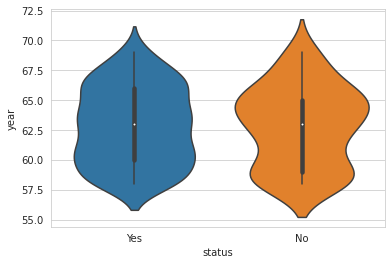

In [ ]:
sns.violinplot(x="status",y="nodes", data=haber, height = 10)
plt.legend
plt.show()

sns.violinplot(x="status",y="age",data = haber,height = 10)
plt.legend
plt.show()

sns.violinplot(x="status",y="year",data = haber,height = 10)
plt.legend
plt.show()

**Observations:**
- More the number of nodes, lesser the survival chances.
- A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive lymph nodes died within 5 years of operation, thus an absence of positive lymph nodes cannot always guarantee survival.
- There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
- There were comparatively more people in the age group 45 to 55 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
- The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.


**Contour Plot**

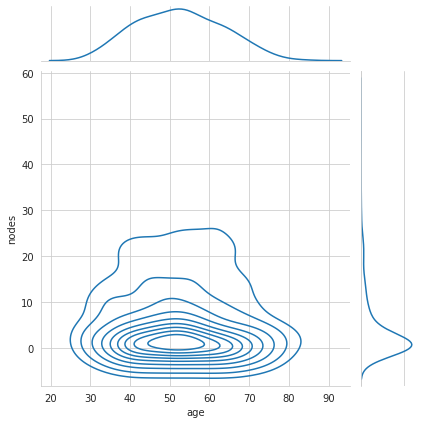

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="age",y="nodes",data=haber,kind="kde")
plt.grid()
plt.show()

**Observation:**

- More denser the colour means more number of data.

- Denser part denote that there are many womens who are suffering from the breast cancer has less number of axillary nodes is just in between 0 to 7.

- Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 45–60 and axillary nodes from 0–3.

# Conclusion

- The given dataset is imbalenced as it does not contains euqal number of data-points for each class.

- The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.

- somehow lymph node is giving some intution in the dataset.

- Patient’s age and operation year alone are not deciding factors for survival. Yet, people less than 35 years have more chance of survival.

- It is also observed that the absence of positive axillary nodes cannot always guarantee survival.

- The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.

- looking at give age, we can conclude that many women who are in the range of 45 to 60 year old are suffering from breast cancer.

- Survival chances are more from age range 47–60 and axillary nodes from 0–3.

- we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.

**References I used while solving this assignment**

https://www.kaggle.com

https://www.breastcancer.org

https://towardsdatascience.com/

https://stackoverflow.com

https://en.wikipedia.org/